In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [96]:
df=pd.read_csv(r"C:\Users\shano\OneDrive\Desktop\heart.csv")
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [97]:
df.head()
df.rename(columns={"thalachh":"MaxHR"},inplace=True)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,MaxHR,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [98]:
df.shape

(303, 14)

In [99]:
df.describe().head()

,age,sex,cp,trtbps,chol,fbs,restecg,MaxHR,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000


In [100]:
df["sex"].value_counts(0)

sex
1    207
0     96
Name: count, dtype: int64

**Summary** **Statistics:**

Age ranges from 29 to 77 years, with a mean of 54.36years.Also,there are 68% men in the sample.
An important finding is that mean of chol(ie.,cholesterol) and MaxHR(ie., maximum heart rate)are 246.26 and 149.64 which are very high that  indicating that majority of participants have hyperlipedimia and Tachycardia.

Data Types: The dataset consists of integer and float data types.

Missing Values: There are no missing values in any of the columns.

Shape of the Dataset: The dataset has 303 observations and 14 features.

**Explarotatory** **Data** **Analysis**

<Axes: >

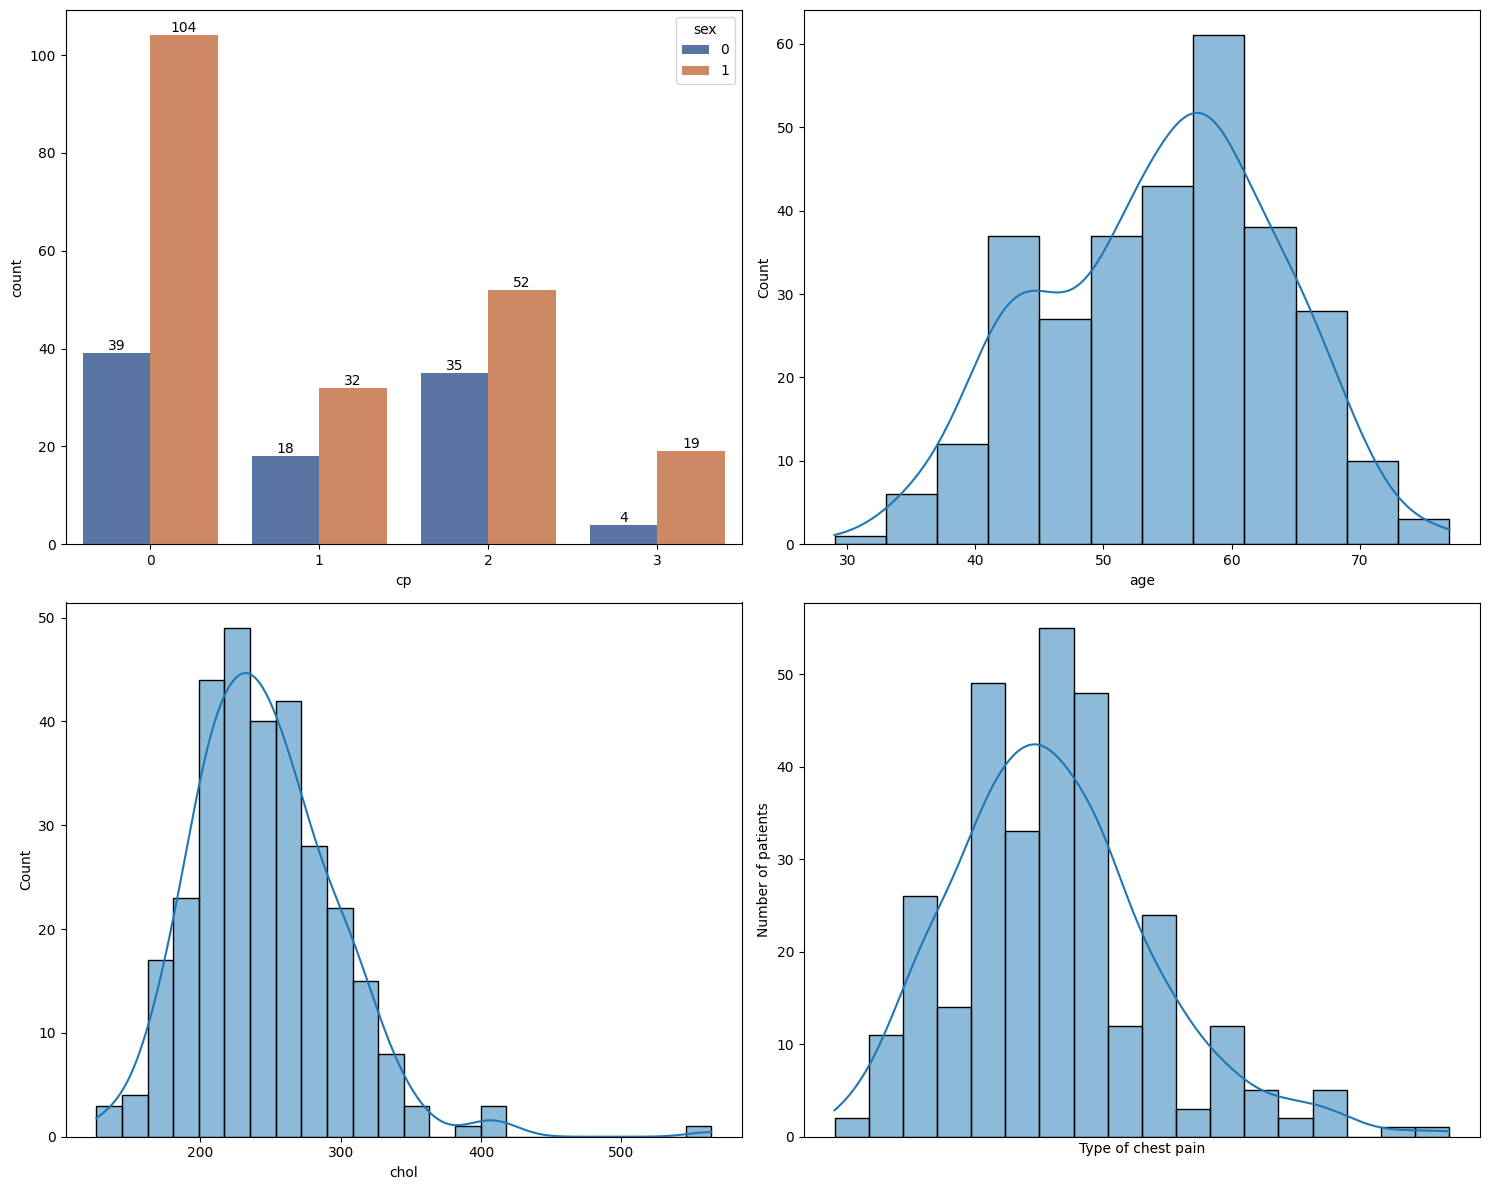

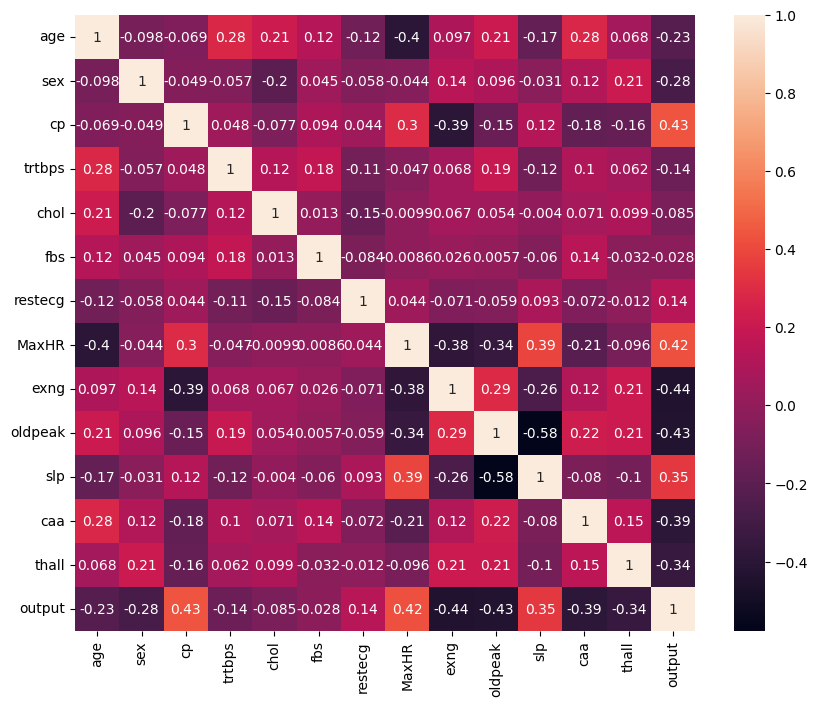

In [101]:
#plot of types of chest pain per sex type
fig,axes = plt.subplots(2,2,figsize=(15,12))
#plot of types of chest pain per sex type
ax = sns.countplot(x="cp",hue="sex",data=df,palette="deep",ax=axes[0,0])
for p in ax.containers:
    ax.bar_label(p)
plt.xlabel("Type of chest pain")
plt.ylabel("Number of patients")
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"],rotation=45)
#distribution of cont variables
sns.histplot(x="age",data=df,kde=True,ax=axes[0,1])
sns.histplot(x="chol",data=df,kde=True,ax=axes[1,0])
sns.histplot(x="trtbps",data=df,kde=True,ax=axes[1,1])
plt.tight_layout()
#Correlation Analysis
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='rocket')

**Descriptive Analysis**

Age Distribution: The age of individuals in the dataset is fairly normally distributed, with a concentration around the 50-60 years age bracket.
Sex Distribution: There is a higher number of male participants (coded as 1) compared to female participants (coded as 0).
Cholesterol Level Distribution: Cholesterol levels show a normal distribution with a concentration around 200-300 mg/dl.
Resting Blood Pressure Distribution: The distribution of resting blood pressure (trtbps) is somewhat normally distributed, centering around 120-140 mmHg.
Correlation Analysis

**The correlation matrix reveals several noteworthy points:**

There is a moderate negative correlation between the maximum heart rate achieved (MaxHR) and age.
The cp (chest pain type) variable shows a moderate positive correlation with the target variable (output), indicating that chest pain type might be a significant predictor of heart disease.
exng (exercise induced angina) and oldpeak (ST depression induced by exercise relative to rest) are moderately negatively correlated with the target variable.
Other variables show low to moderate correlations.

from above graph we can tell that more men have typical angina

In [102]:
#checking distribution of target variable 80%vs20% should not be tr
df["output"].value_counts()

output
1    165
0    138
Name: count, dtype: int64

0-->defect heart
1-->Normal heart

In [103]:
x=df.drop(columns="output",axis=1)
y=df["output"]

In [104]:
#spliting data into test and train data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y,random_state=40)

In [106]:
print(x.shape,x_test.shape,x_train.shape)

(303, 13) (61, 13) (242, 13)


In [107]:
lr=LogisticRegression()
#training model
lr.fit(x_train,y_train)

C:\Users\shano\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

****Calculate Odds ratio and p-value using LogisticRegression**

In [108]:
# Add a constant term for the intercept in predictors
predictors_with_const = sm.add_constant(x)
#calculate coefficients
coefficients = lr.coef_[0]
# Calculating odds ratios which is exponentition of coeffecients
odds_ratios = pd.DataFrame(np.exp(coefficients), index=x.columns)
odds_ratios.rename(columns={0:"Odds ratio"},inplace=True)
# Fit logistic regression model using StatsModels
logit_model = sm.Logit(y, predictors_with_const)
result = logit_model.fit()
p_values = result.pvalues
p_values.drop("const",axis=0,inplace=True)
p_values

#Final table showing boths OR and p-value
fin_rel = pd.concat([odds_ratios,p_values],axis=1)
fin_rel.reset_index(inplace=True)
fin_rel.rename(columns={0:"p-value",'index':'variable'},inplace=True)
fin_rel['Significance'] = np.where(fin_rel['p-value'] <= 0.05, 'Significant', 'Not Significant')
fin_rel

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


,variable,Odds ratio,p-value,Significance
0,age,1.016942,0.832266,Not Significant
1,sex,0.365749,0.000176,Significant
2,cp,2.066027,0.000004,Significant
3,trtbps,0.989085,0.059582,Not Significant
4,chol,0.997584,0.220873,Not Significant
5,fbs,0.908283,0.947464,Not Significant
6,restecg,1.514841,0.180618,Not Significant
7,MaxHR,1.027747,0.026485,Significant
8,exng,0.500604,0.016782,Significant
9,oldpeak,0.582669,0.011523,Significant


<Axes: xlabel='Odds ratio', ylabel='variable'>

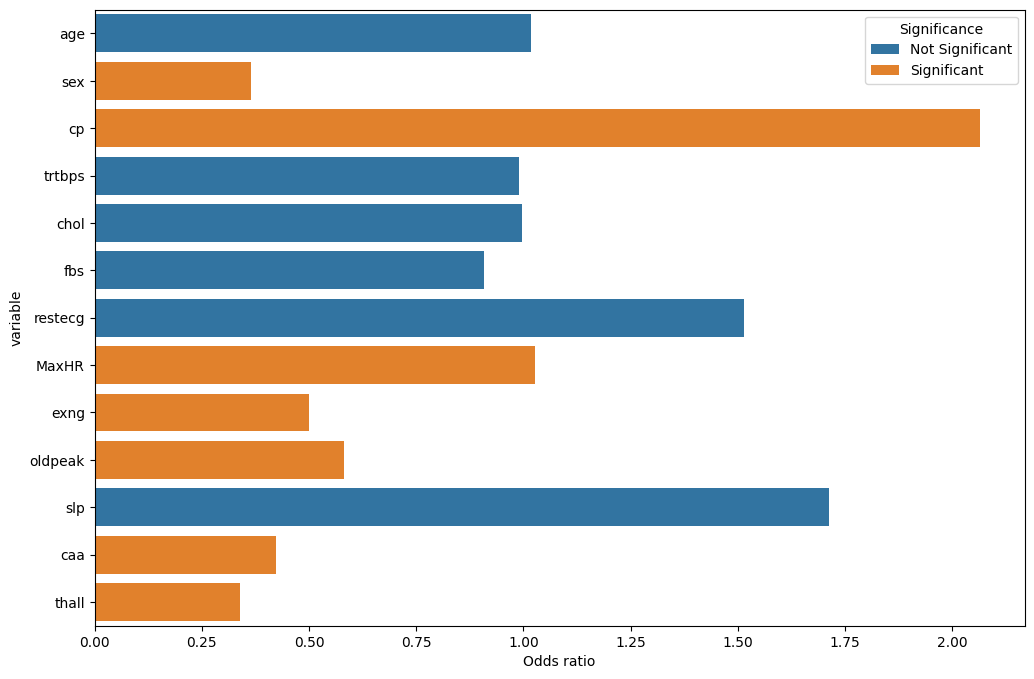

In [109]:
plt.figure(figsize=(12,8))
sns.barplot(x="Odds ratio", y="variable",hue="Significance",dodge =False,data=fin_rel)

*from above graph we can see that sex,chest pain,Maximum HR,exng, peak ECG,no.cardiac vessels effected,thallesemia are significantly positively associated with risk of heart attack*

**PREDICTION OF HEART ATTACK RISK USING**                                                       
***LOGISTIC REGRESSION ,SVM ,KNN ,RANDOM FOREST PLT***

In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [111]:
#predict
predict = lr.predict(x_test)

In [112]:
#accuracy on train data in LR
Xtr_pred=lr.predict(x_train)
XtrAc = accuracy_score(Xtr_pred,y_train)
print("accuracy of train data:",XtrAc)


accuracy of train data: 0.8636363636363636


In [113]:
#accuracy on test data LR
Xt_pred=lr.predict(x_test)
XtAc = accuracy_score(Xt_pred,y_test)
print("accuracy of train data:",XtAc)

accuracy of train data: 0.8688524590163934


In [114]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

**SuperVectorMachine**

In [115]:
sv = SVC()
sv.fit(x_train,y_train)

SVC()

In [116]:
sv.score(x_test,y_test)

0.7049180327868853

**Random** **Forest** **Model**

In [117]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.8688524590163934

**K** **nearest** **neighbour**

In [118]:
#n_neighbour should not be multiple of 2 because output as 2 value
kn = KNeighborsClassifier(n_neighbors=5)

In [119]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [120]:
kn.score(x_test,y_test)

0.639344262295082

In [121]:
#Real world example using logistic regression model with accuracy of 86%
data = [[45,1,1,120,110,0,1,111,0,1,0,0,2]]
lr.predict(data)

C:\Users\shano\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

**CONCLUSION**

1.Most of the models are performing really well.                                               
2.Logistic regression is performing the best for the given dataset.